# Evolución Diferencial.

## Instalación de paquetes necesarios.

In [1]:
!pip install celluloid pillow ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=e7c14a82e3c1af6713ec9a0c1ca64602e113db551b730f496f4754fdfc503081
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from matplotlib import  rc, animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Implementación del algoritmo de evolución diferencial.

In [3]:
# Función para ejecutar el algoritmo DE
def differential_evolution_algorithm(f, bounds, popsize=20, maxiter=1000, tol=1e-6, history=False):
    n_dim = len(bounds)
    pop = np.random.rand(popsize, n_dim)
    pop = bounds[:, 0] + (bounds[:, 1] - bounds[:, 0]) * pop
    fitness = np.array([f(x) for x in pop])
    best_idx = np.argmin(fitness)
    best = pop[best_idx]
    pop_hist=[]
    if history:
        pop_hist.append(np.copy(pop))
    for i in range(maxiter):
        for j in range(popsize):
            idxs = list(range(popsize))
            idxs.remove(j)
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = a + 0.8 * (b - c)
            mutant = np.clip(mutant, bounds[:, 0], bounds[:, 1])
            trial = np.where(np.random.rand(n_dim) < 0.5, mutant, pop[j])
            f_trial = f(trial)
            if f_trial < fitness[j]:
                fitness[j] = f_trial
                pop[j] = trial
                if f_trial < fitness[best_idx]:
                    best_idx = j
                    best = trial
        if history:
            pop_hist.append(np.copy(pop))
        if np.abs(fitness[best_idx] - f(pop.mean(axis=0))) < tol:
            break
    if history:
        return best, fitness[best_idx], pop_hist
    else:
        return best, fitness[best_idx]

## Ejecución del algoritmo.

### Rosenbrock 3d.

In [4]:
def rosenbrock(X):
    result = 0
    for i in range(len(X)-1):
        result += 100*(X[i+1]-X[i]**2)**2+(X[i]-1)**2
    return result

In [5]:
# Prueba del algoritmo DE en la función de Rosenbrock
bounds = np.array([(-6, 6), (-6, 6)])
best, f_best, pop_hist = differential_evolution_algorithm(rosenbrock, bounds, history=True)

# Imprime la solución y el valor óptimo encontrado
print('Mejor solución encontrada:')
print(best)
print('Valor óptimo encontrado:')
print(f_best)

Mejor solución encontrada:
[0.99973386 0.99937572]
Valor óptimo encontrado:
9.184019155315795e-07


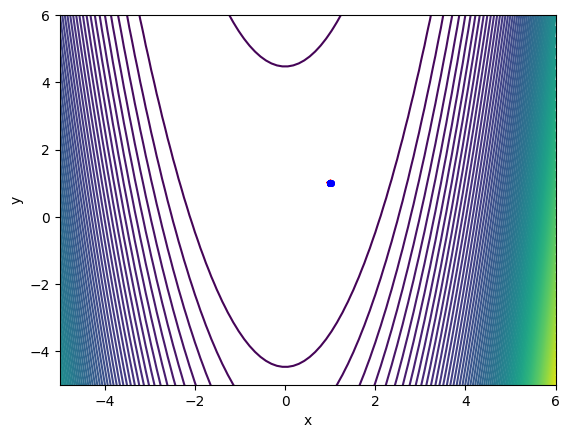

In [6]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig, ax = plt.subplots()

ax.set_xlim(( -5, 6))
ax.set_ylim((-5, 6))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(1,1,"r*")
plot, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)


def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    plot.set_data(pop_hist[i][:, 0], pop_hist[i][:, 1])
    return (plot,)

anim = animation.FuncAnimation(fig,
                               animate,
                               init_func=init,
                               frames=len(pop_hist)-1,
                               interval=50,
                               blit=True)

HTML(anim.to_html5_video())

In [7]:
anim.save("ED_ros3d.gif", dpi=120, writer="pillow")

### Rosenbrock 4d.

In [8]:
# Prueba del algoritmo DE en la función de Rosenbrock
bounds = np.array([(-6, 6), (-6, 6), (-6, 6)])
best, f_best, pop_hist = differential_evolution_algorithm(rosenbrock, bounds, history=True)

# Imprime la solución y el valor óptimo encontrado
print('Mejor solución encontrada:')
print(best)
print('Valor óptimo encontrado:')
print(f_best)

Mejor solución encontrada:
[1.00117918 1.00223456 1.00451929]
Valor óptimo encontrado:
8.15500972294582e-06


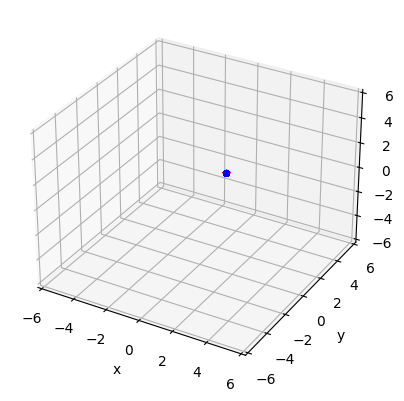

In [9]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(1,1,1, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = pop_hist[i][:, 0]
    y_points = pop_hist[i][:, 1]
    z_points = pop_hist[i][:, 2]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(pop_hist)-1, interval=50, blit=True)
HTML(anim.to_html5_video())

In [10]:
anim.save("ED_ros4d.gif", dpi=120, writer="pillow")

### Six hump camel 3d.

In [11]:
def six_hump_camel(X):
    if len(X) == 3:
        x, y, z = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2+z**2
    else:
        x, y = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2

In [12]:
# Prueba del algoritmo DE en la función del camello
bounds = np.array([(-3, 3), (-2, 2)])
best, f_best, pop_hist = differential_evolution_algorithm(six_hump_camel, bounds, history=True)

# Imprime la solución y el valor óptimo encontrado
print('Mejor solución encontrada:')
print(best)
print('Valor óptimo encontrado:')
print(f_best)

Mejor solución encontrada:
[-0.08984177  0.71265637]
Valor óptimo encontrado:
-1.0316284534896452


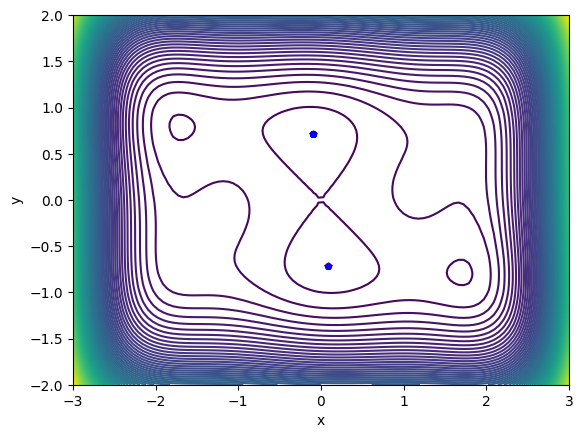

In [13]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = six_hump_camel((X, Y))

fig, ax = plt.subplots()

ax.set_xlim((-3, 3))
ax.set_ylim((-2, 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(0.0898,-0.7126, "r*")
ax.plot(-0.0898,0.7126, "r*")
plot, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)


def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    plot.set_data(pop_hist[i][:, 0], pop_hist[i][:, 1])
    return (plot,)

anim = animation.FuncAnimation(fig,
                               animate,
                               init_func=init,
                               frames=len(pop_hist)-1,
                               interval=50,
                               blit=True)

HTML(anim.to_html5_video())

In [14]:
anim.save("ED_thc3d.gif", dpi=120, writer="pillow")

### Six hump camel 4d

In [15]:
# Prueba del algoritmo DE en la función del camello
bounds = np.array([(-3, 3), (-2, 2), (-3, 3)])
best, f_best, pop_hist = differential_evolution_algorithm(six_hump_camel, bounds, history=True)

# Imprime la solución y el valor óptimo encontrado
print('Mejor solución encontrada:')
print(best)
print('Valor óptimo encontrado:')
print(f_best)

Mejor solución encontrada:
[-0.08994426  0.71266641 -0.00081724]
Valor óptimo encontrado:
-1.0316284053667581


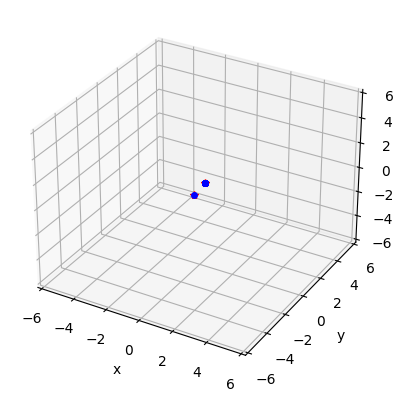

In [16]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(0.0898,-0.7126, 0, "r*")
ax.plot(-0.0898,0.7126, 0, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = pop_hist[i][:, 0]
    y_points = pop_hist[i][:, 1]
    z_points = pop_hist[i][:, 2]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(pop_hist)-1, interval=50, blit=True)
HTML(anim.to_html5_video())

In [17]:
anim.save("ED_thc4d.gif", dpi=120, writer="pillow")